# Predictive Modelling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Data Collection and Data Exploration

In [4]:
#Combined cycle power plant dataset download in UCI machine learning repository
#https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant 
df=pd.read_excel(r"C:\Users\Rahul\Downloads\CCPP\CCPP\Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.shape

(9568, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## 3.Data Cleaning

In [8]:
df.duplicated().sum()

41

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [11]:
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

## 4.Feature Enginerring

### Correlation Analysis

In [12]:
corr=df.corr()
corr

,AT,V,AP,RH,PE
AT,1.000000,0.843689,-0.508222,-0.543947,-0.947908
V,0.843689,1.000000,-0.415718,-0.312214,-0.869900
AP,-0.508222,-0.415718,1.000000,0.101631,0.518687
RH,-0.543947,-0.312214,0.101631,1.000000,0.391175
PE,-0.947908,-0.869900,0.518687,0.391175,1.000000


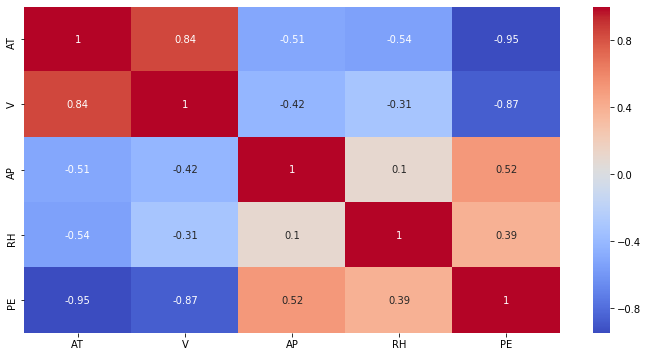

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## Annova

In [14]:
x=['AT','V','AP','RH']
y=df['PE']

from sklearn.feature_selection import f_regression
for i in x:
    fscore,pvalue=f_regression(df[[i]],y)
    print(i,pvalue)   

AT [0.]
V [0.]
AP [0.]
RH [0.]


## 5.Preprocessing

In [15]:
x=df[['AT','V','AP','RH']]
x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [17]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7621, 4)
(1906, 4)
(7621,)
(1906,)


## 6.Apply algorithm

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 7.Performance Analysis

In [19]:
pred=model.predict(xtest)

In [20]:
Result=pd.DataFrame({'Actual':ytest,'Predicted':pred})

In [21]:
Result.sample(10)

,Actual,Predicted
6410,476.91,473.769164
1896,462.13,460.967393
6146,453.36,449.857906
9189,433.24,428.412258
7927,436.89,438.255411
164,441.70,438.991660
4567,485.20,479.904317
6104,470.17,472.006030
4664,449.95,450.399513
3746,432.73,436.226948


In [22]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9302847464353334

## 8.Export the Model

In [24]:
#export the model into pickle file and we can be integrated to mobile/web app
import joblib
joblib.dump(model,r"C:\Users\Rahul\github\Machine-Learning-Training-Xebia\Predictive_model.pkl")

['C:\\Users\\Rahul\\github\\Machine-Learning-Training-Xebia\\Predictive_model.pkl']